In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Import Mobility Data

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
# keep FIPS as string to preserve leading zeroes

In [4]:
combined = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/hia_covid_combined.csv", dtype={'County_FIPS': 'str'} )

In [5]:
combined.Name = combined.locationcol

In [6]:
colsub = [i for i in combined.columns if "Death" in i]

In [7]:
combined[(combined.Date > '2020-11-15') & (combined.Name.str.contains("Garfield")) & (combined.Name.str.contains("Nebrask"))][colsub]

,Deaths,Deaths_Previous,Deaths_New,Deaths_New_7,Deaths_New_14,Deaths_New_21,Deaths_New_28,Deaths_New_RollingAvg,Deaths_New_7_RollingAvg,Deaths_New_14_RollingAvg,...,Deaths_New_PER_100K,Deaths_New_7_PER_100K,Deaths_New_14_PER_100K,Deaths_New_21_PER_100K,Deaths_New_28_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K
531811,0,0.00000,0.00000,1.00000,0.00000,nan,nan,0.00000,0.14286,0.28571,...,0.00000,51.07252,0.00000,nan,nan,0.00000,7.29607,14.59215,nan,nan
531812,0,0.00000,0.00000,0.00000,1.00000,nan,nan,0.00000,0.14286,0.42857,...,0.00000,0.00000,51.07252,nan,nan,0.00000,7.29607,21.88822,nan,nan
531813,0,0.00000,0.00000,0.00000,0.00000,nan,nan,0.00000,0.14286,0.42857,...,0.00000,0.00000,0.00000,nan,nan,0.00000,7.29607,21.88822,nan,nan
531814,0,0.00000,0.00000,2.00000,nan,nan,nan,0.00000,0.42857,nan,...,0.00000,102.14505,nan,nan,nan,0.00000,21.88822,nan,nan,nan
531815,0,0.00000,0.00000,0.00000,nan,nan,nan,0.00000,0.42857,nan,...,0.00000,0.00000,nan,nan,nan,0.00000,21.88822,nan,nan,nan
531816,0,0.00000,0.00000,0.00000,nan,nan,nan,0.00000,0.42857,nan,...,0.00000,0.00000,nan,nan,nan,0.00000,21.88822,nan,nan,nan
531817,0,0.00000,0.00000,0.00000,nan,nan,nan,0.00000,0.42857,nan,...,0.00000,0.00000,nan,nan,nan,0.00000,21.88822,nan,nan,nan
531818,1,0.00000,1.00000,0.00000,nan,nan,nan,0.14286,0.28571,nan,...,51.07252,0.00000,nan,nan,nan,7.29607,14.59215,nan,nan,nan
531819,1,1.00000,0.00000,1.00000,nan,nan,nan,0.14286,0.42857,nan,...,0.00000,51.07252,nan,nan,nan,7.29607,21.88822,nan,nan,nan
531820,1,1.00000,0.00000,0.00000,nan,nan,nan,0.14286,0.42857,nan,...,0.00000,0.00000,nan,nan,nan,7.29607,21.88822,nan,nan,nan


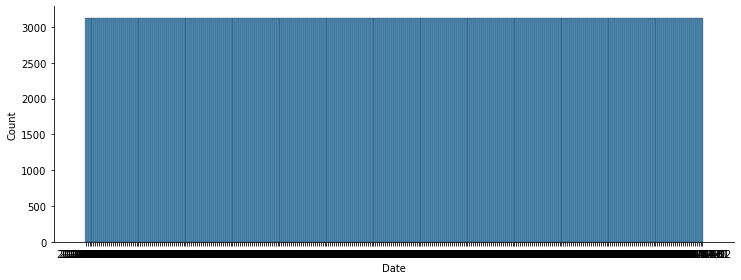

In [8]:
sns.displot(combined.Date, height=4, aspect=2.6)

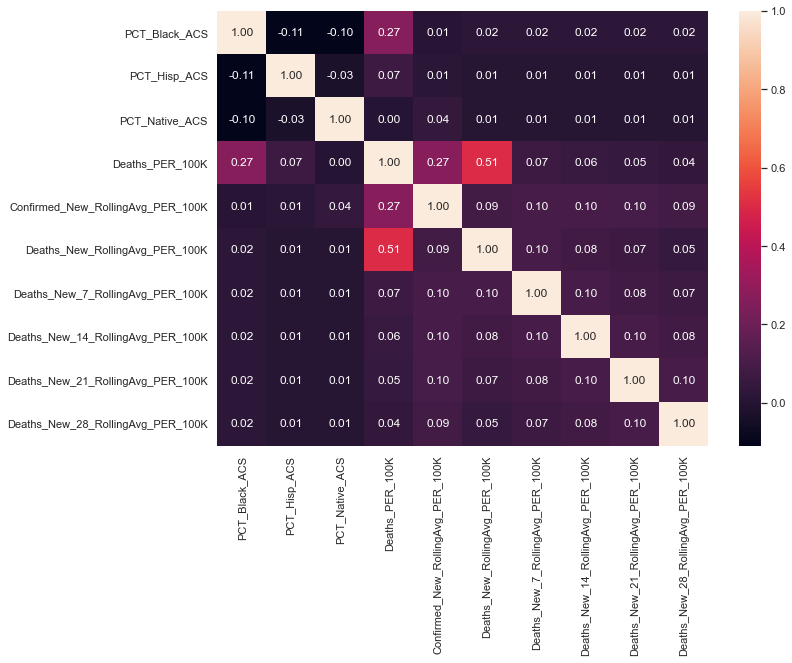

In [11]:

cols_subset = [i for i in combined.columns if ("PER_100K" in i and "Rolling" in i) 
               or ("ACS" in i and "PCT" in i) or i == "Deaths_PER_100K"]
combined_sub2 = combined[cols_subset]

sns.set(rc={'figure.figsize':(11,8)})
corr = combined_sub2.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

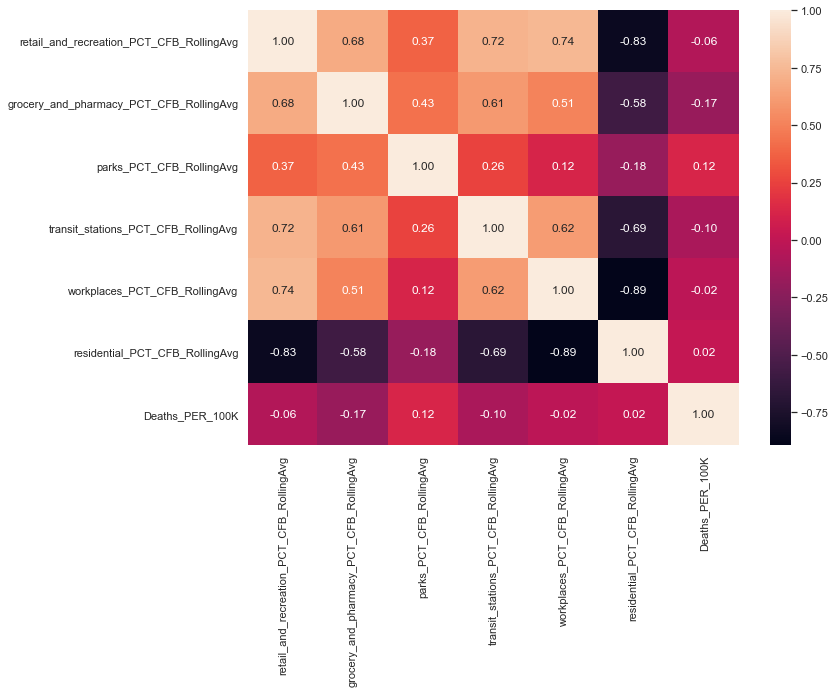

In [15]:

cols_subset = [i for i in combined.columns if ("CFB" in i and "Rolling" in i)
                          or i == "Deaths_PER_100K"]

combined_sub2 = combined[cols_subset]

sns.set(rc={'figure.figsize':(11,8)})
corr = combined_sub2.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [16]:
combined.Deaths.isna().value_counts()

False    989080
Name: Deaths, dtype: int64

In [17]:
combined['Date'] = combined['Date'].astype("datetime64")

In [18]:
combined_sub = combined.drop(columns=['Unnamed: 0','Country/Region'])

In [19]:
combined_sub.Name.isna().value_counts()

False    989080
Name: Name, dtype: int64

In [20]:
combined_sub.locationcol.isna().value_counts()

False    989080
Name: locationcol, dtype: int64

In [21]:
combined_sub['Date'].isna().value_counts()

False    989080
Name: Date, dtype: int64

In [22]:
combined_sub['State Code'].isna().value_counts()

False    989080
Name: State Code, dtype: int64

## Examine per-county distributions

In [23]:
list_cols = list(combined_sub.columns)

list_cols = [i for i in list_cols if i not in ["Date","locationcol","State","State Code","Name","County_FIPS","Region","Division","Metro"]]
list_cols

['retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB',
 'retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'BACHELORS_PLUS_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018',
 'Population_ACS',
 'Population_Black_ACS',
 'Population_Hisp_ACS',
 'Population_Native_ACS',
 'PCT_Black_ACS',
 'PCT_Hisp_ACS',
 'PCT_Native_ACS',
 'UrbanCD_Description',
 'Confirmed',
 'Deaths',
 'Deaths_Previous',
 'Confirmed_Previous',
 'Deaths_New',
 'Deaths_New_7',
 'Deaths_New_14',
 'Deaths_New_21',
 'Deaths_New_28',
 'Confirmed_New',
 'Confirmed_New_RollingAvg',
 'Deaths_New_RollingAvg',
 'Deaths_New_7_RollingAvg',
 'Deaths_New_14_RollingAvg',
 'Deaths_New_21_RollingAvg',


In [24]:
#county_desc = combined_sub[["locationcol","County_FIPS","State Code","Region","Division","Metro"]].drop_duplicates()
#county = pd.DataFrame(county) 
#county.reset_index(inplace=True)

county = combined_sub.groupby(["Name","County_FIPS","State Code","Region","Division","Metro"])[list_cols].mean()

In [25]:
county.reset_index(inplace=True)

In [26]:
county_samp = county.sample(frac=.1)

In [27]:
county.PCT_Hisp_ACS.describe()

count   3130.00000
mean       9.13399
std       13.73332
min        0.00000
25%        2.04563
50%        3.97820
75%        9.28364
max       99.18480
Name: PCT_Hisp_ACS, dtype: float64

In [28]:
county[county.Name.str.contains("Fairfax")]

,Name,County_FIPS,State Code,Region,Division,Metro,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,...,Deaths_New_14_PER_100K,Deaths_New_21_PER_100K,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K
893,Fairfax City|Virginia,51600,VA,South,South Atlantic,Large_metro,-32.48921,-9.32576,-39.83333,nan,...,0.12638,0.12938,0.13253,2.85418,2.89784,0.12352,0.12597,0.12895,0.13207,0.13535


In [29]:
county.Deaths_PER_100K.describe()

count   3130.00000
mean      22.94342
std       27.26631
min        0.00000
25%        6.11656
50%       14.08615
75%       29.42596
max      268.80660
Name: Deaths_PER_100K, dtype: float64

In [30]:
county[(county.Deaths_PER_100K >= county.Deaths_PER_100K.mean()*10)]

,Name,County_FIPS,State Code,Region,Division,Metro,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,...,Deaths_New_14_PER_100K,Deaths_New_21_PER_100K,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K
274,Bronx|New York,36005,NY,Northeast,Middle Atlantic,Large_metro,-25.73702,-7.05536,-4.73702,-31.77509,...,1.14269,1.16980,1.19823,14.17493,14.14232,1.11718,1.13930,1.16625,1.19450,1.22415
1168,Hancock|Georgia,13141,GA,South,South Atlantic,Micropolitan,nan,0.57143,nan,nan,...,1.75745,1.79915,1.84288,19.52306,18.80862,1.71763,1.75165,1.79307,1.83650,1.88209
2371,Randolph|Georgia,13243,GA,South,South Atlantic,Noncore_adjacent,-43.33333,nan,nan,nan,...,1.37854,1.41125,1.44555,16.30035,16.55912,1.36014,1.38708,1.41988,1.45427,1.49037
2764,Terrell|Georgia,13273,GA,South,South Atlantic,Smaller_metro,-9.29412,-1.07843,nan,nan,...,1.21710,1.24598,1.27627,14.39144,14.35162,1.18953,1.21309,1.24177,1.27185,1.30342


In [31]:
county[county.Metro.isna() == True]

,Name,County_FIPS,State Code,Region,Division,Metro,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,...,Deaths_New_14_PER_100K,Deaths_New_21_PER_100K,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K


## Longitudinal graphs by county

In [32]:
import random 


In [33]:
bigh = combined_sub[combined_sub.County_FIPS == "04001"]
bigh.head(40)

,Date,County_FIPS,State Code,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division
30020,2020-01-22,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,nan,nan,nan,nan,nan,nan,nan,West,Mountain
30021,2020-01-23,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,West,Mountain
30022,2020-01-24,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,West,Mountain
30023,2020-01-25,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,West,Mountain
30024,2020-01-26,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,West,Mountain
30025,2020-01-27,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,West,Mountain
30026,2020-01-28,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,0.00000,0.00000,0.00000,0.00000,West,Mountain
30027,2020-01-29,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,West,Mountain
30028,2020-01-30,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,West,Mountain
30029,2020-01-31,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,West,Mountain


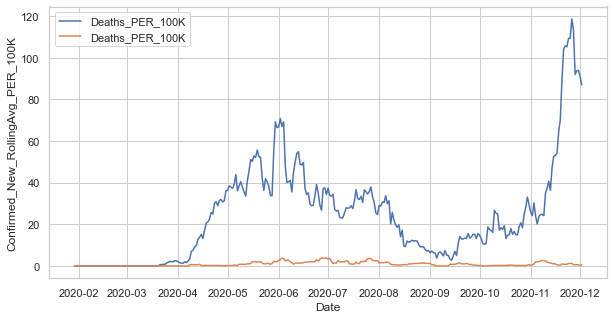

In [34]:
sns.set_style("whitegrid")


plt.figure(figsize=(10,5)) 
sns.lineplot(x="Date", y="Confirmed_New_RollingAvg_PER_100K", label="Deaths_PER_100K", data=bigh)
sns.lineplot(x="Date", y="Deaths_New_RollingAvg_PER_100K", label="Deaths_PER_100K", data=bigh)
plt.legend(loc="upper left")
plt.show()

In [35]:
combined_sub[combined_sub.Date.isna() == True]

,Date,County_FIPS,State Code,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division


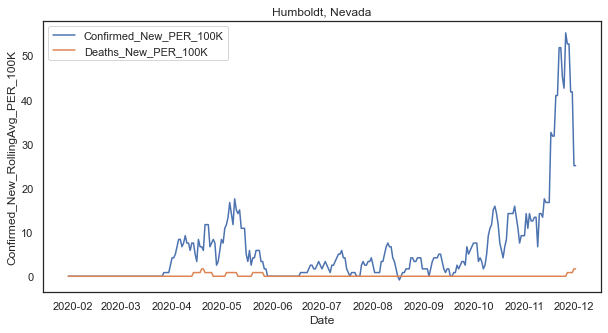

32013


In [43]:
sns.set_style("white")

u_FIPS = list(combined_sub.County_FIPS.unique())
random_FIPS =  random.choice(u_FIPS)

random_df = combined_sub[combined_sub.County_FIPS == random_FIPS]
random_name = combined_sub[combined_sub.County_FIPS == random_FIPS]['Name'].iloc[0]
random_state = combined_sub[combined_sub.County_FIPS == random_FIPS]['State'].iloc[0]

plt.figure(figsize=(10,5)) 
sns.lineplot(x="Date", y="Confirmed_New_RollingAvg_PER_100K", label="Confirmed_New_PER_100K", data=random_df)
sns.lineplot(x="Date", y="Deaths_New_RollingAvg_PER_100K", label="Deaths_New_PER_100K", data=random_df)
plt.legend(loc="upper left")
plt.title("{title}".format(title=random_name.replace('|',', ')))
plt.show()
print(random_FIPS)

In [44]:
import random as random

list_counties = list(county[county.Population_ACS >= 100000].County_FIPS.unique())
list_random = random.choices(list_counties, k=4)

In [45]:
travis = combined_sub[combined_sub.Name=='Travis|Texas']
travis.to_csv("travis.csv")

In [46]:
combined_sub

,Date,County_FIPS,State Code,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division
0,2020-01-22,01001,AL,Autauga|Alabama,nan,nan,nan,nan,nan,nan,...,0.00000,nan,nan,nan,nan,nan,nan,nan,South,East South Central
1,2020-01-23,01001,AL,Autauga|Alabama,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,South,East South Central
2,2020-01-24,01001,AL,Autauga|Alabama,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,South,East South Central
3,2020-01-25,01001,AL,Autauga|Alabama,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,South,East South Central
4,2020-01-26,01001,AL,Autauga|Alabama,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,South,East South Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989075,2020-11-28,56045,WY,Weston|Wyoming,nan,nan,nan,nan,nan,nan,...,nan,0.00000,60.21799,2.00727,nan,nan,nan,nan,West,Mountain
989076,2020-11-29,56045,WY,Weston|Wyoming,nan,nan,nan,nan,nan,nan,...,nan,0.00000,48.17439,2.00727,nan,nan,nan,nan,West,Mountain
989077,2020-11-30,56045,WY,Weston|Wyoming,nan,nan,nan,nan,nan,nan,...,nan,14.05086,50.18166,0.00000,nan,nan,nan,nan,West,Mountain
989078,2020-12-01,56045,WY,Weston|Wyoming,nan,nan,nan,nan,nan,nan,...,nan,168.61037,52.18892,2.00727,nan,nan,nan,nan,West,Mountain


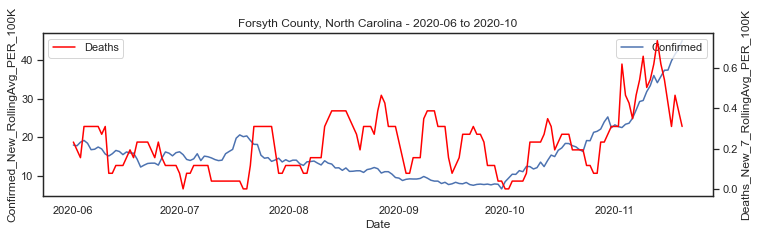

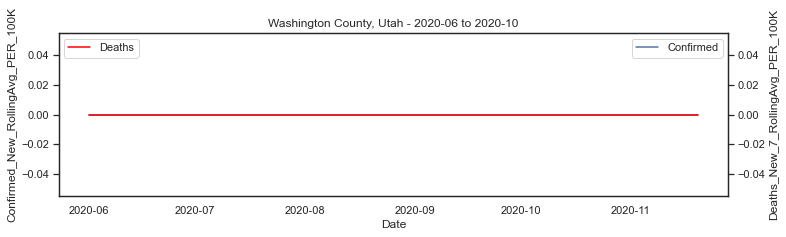

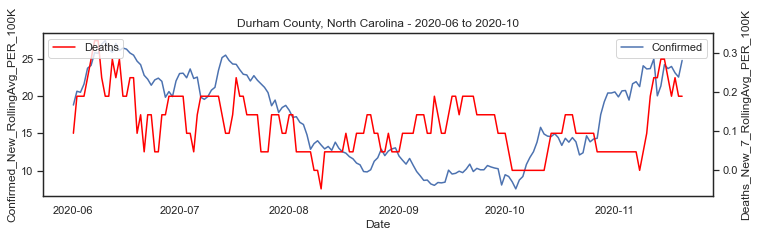

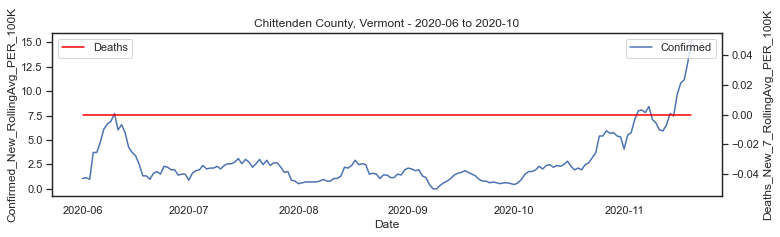

In [47]:
for i in list_random:
    sns.set_style("white")
    bigh = combined_sub[combined_sub['County_FIPS'] == i]
    bigh = bigh[bigh.Date <= '2020-11-20']
    bigh = bigh[bigh.Date >= '2020-06-01']
    name_county = bigh.Name.iloc[0]
    plt.figure(figsize=(12,3)) 
    ax = sns.lineplot(x="Date", y="Confirmed_New_RollingAvg_PER_100K", label="Confirmed", data=bigh)
    plt.legend(loc="upper right")
    ax2 = ax.twinx()
    ax2 = sns.lineplot(x="Date", y="Deaths_New_7_RollingAvg_PER_100K", label="Deaths", color='red', data=bigh)
    plt.title("{x} - 2020-06 to 2020-10".format(x=name_county.replace('|',' County, ')))
    plt.legend(loc="upper left")
    plt.show()

In [48]:
list_tup = []
for i in range(4,9):
    a = '2020-0{c}-01'.format(c=i)
    b = '2020-0{c}-01'.format(c=i+1)
    list_tup.append((a,b))

for i in range(10,12):
    a = '2020-{c}-01'.format(c=i)
    b = '2020-{c}-01'.format(c=i+1)
    list_tup.append((a,b))

In [49]:
list_tup

[('2020-04-01', '2020-05-01'),
 ('2020-05-01', '2020-06-01'),
 ('2020-06-01', '2020-07-01'),
 ('2020-07-01', '2020-08-01'),
 ('2020-08-01', '2020-09-01'),
 ('2020-10-01', '2020-11-01'),
 ('2020-11-01', '2020-12-01')]

## Make the county level dataframe population - weighted 

In the county-level dataset, each county is represented by one row. However, to do density analysis, this view is misleading because of the extreme inequality of county populations. To remedy this, we can explode the dataset to give each county a row in the dataset for each 1,000 residents. 

In [ ]:
sns.displot(county.Population_ACS, kind="kde").set(xscale = 'log')

In [ ]:
list_frame = []

from tqdm import tqdm

for i in tqdm(list(county.County_FIPS.unique())):
    frame = county[county.County_FIPS == i]
    frame['pop_1k'] = frame['Population_ACS']/1000 # Each row will represent 1k people
    frame['key'] = 'key'
    joinframe = pd.DataFrame(pd.Series(list(range(0,int(frame.pop_1k.max())))))
    joinframe['key'] = 'key'
    joinframe.columns = ['val','key']
    cartesian = frame.merge(joinframe, on="key")
    #frame_weighted = cartesian[cartesian.Deaths <= cartesian.val]
    list_frame.append(cartesian)

In [ ]:
frame_concat = pd.concat(list_frame)

In [ ]:
frame_concat.shape[0]
# roughly one row per 1,000 inhabitants of the US

In [ ]:
plt.figure(figsize=(16,9)) 
frame = frame_concat.sample(frac=.1)
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
frame.sort_values(by="Metro", inplace=True)
#frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
frame = frame.sort_values(by="Metro")
#sns.violinplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame, scale="count")
sns.boxplot(x="Metro", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
sns.stripplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame.sample(frac=.05), size=6, alpha=.4, dodge=True, palette="viridis")
plt.show()


In [ ]:
plt.figure(figsize=(18,9)) 
frame = frame_concat.sample(frac=.1)
frame.sort_values(by="Division", inplace=True)
frame = frame.sort_values(by="Region")
sns.violinplot(x="Division", y="Deaths_PER_100K", label="work", data=frame)
sns.boxplot(x="Division", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
#sns.swarmplot(x="Division", y="Deaths_PER_100K", label="work", data=frame, size=.5, alpha=.6, dodge=True, palette="viridis")
plt.show()


In [ ]:
plt.figure(figsize=(18,9)) 
frame = frame_concat[frame_concat.Division == "New England"].sample(frac=.1)
frame.sort_values(by="Metro", inplace=True)
ax = sns.violinplot(x="Metro", y="Deaths_PER_100K", label="work", palette="viridis", alpha=.2, scale="count", data=frame)
#sns.boxplot(x="Metro", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
#ax = sns.swarmplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame, size=2, dodge=True, palette="viridis")
plt.setp(ax.collections, alpha=.3)
plt.show()


In [ ]:
import numpy as np
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [ ]:
def boxplot_with_violins(df, Yvar = "Deaths_PER_100K", group="Region"):
    frame = df
    frame = frame.sort_values(by=group)
    #frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]

    fig = plt.figure(figsize=(9,6))

    ax = sns.boxplot(x=group, y=Yvar, data=frame, boxprops={'facecolor':'None'}, fliersize=0)
    ax = sns.violinplot(x=group, y=Yvar, scale="count", data=frame, inner="quart", despine=True)

    plt.setp(ax.collections, alpha=.4)
    plt.ylim(-10,frame["{Yvar}".format(Yvar=Yvar)].max()*.95)

    adjust_box_widths(fig, 0.9)
    
    fig.show()

In [ ]:
def upper_limit(series):
    from scipy.stats import iqr
    import numpy as np
    Q3 = np.percentile(series, 75, interpolation = 'midpoint') 
    return int(Q3+(4*iqr(series)))

In [ ]:
def boxplot_with_violins_grp(df, Yvar = "Deaths_PER_100K",  group="Region"):
    frame = df
    frame = frame.sort_values(by=group)
    #frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]

    fig = plt.figure(figsize=(24,12))
    
    ax = sns.boxplot(x=group, y=Yvar, hue="Metro", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
    ax = sns.violinplot(x=group, y=Yvar, hue="Metro", scale="count", data=frame, inner="quart", despine=True)

    #Make legend distinct 
    handles, labels = ax.get_legend_handles_labels()
    num_legend = len(df["{x}".format(x=group)].unique())
    plt.legend(handles[0:num_legend], labels[0:num_legend], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.setp(ax.collections, alpha=.4)
    
    #plt.ylim(-10,frame["{Yvar}".format(Yvar=Yvar)].max()*.75)
   
    upper_limit_number = upper_limit(frame["{Yvar}".format(Yvar=Yvar)])
    plt.ylim(-10,upper_limit_number)
    adjust_box_widths(fig, 0.8)
    #plt.legend()
    fig.show()

In [ ]:
boxplot_with_violins_grp(frame_concat,Yvar = "Confirmed_PER_100K")

In [ ]:
frame = frame_concat.sample(frac=.1)
#frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

ax = sns.boxplot(x="Region", y="Deaths_PER_100K", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.swarmplot(x="Region", y="Deaths_PER_100K",  alpha=.95, data=frame, size=.75, dodge=True)
#plt.setp(ax.collections, alpha=.9)
plt.ylim(-10,frame.Deaths_PER_100K.max()*1.1)

adjust_box_widths(fig, 0.9)

In [ ]:
frame_concat.columns

In [ ]:
frame = frame_concat
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

#ax = sns.boxplot(x="Division", y="Confirmed_New_RollingAvg_PER_100K", hue="Metro", data=frame, fliersize=0)
ax = sns.violinplot(x="Division", y="Confirmed_New_RollingAvg_PER_100K",  hue="Metro", scale="count", data=frame, inner="quart", size=2, dodge=True, despine=True)
plt.setp(ax.collections, alpha=.4)
plt.ylim(-10,150)

adjust_box_widths(fig, 0.9)

In [ ]:
pop = pd.DataFrame(frame.groupby(["Division"])["Population_ACS"].sum())

In [ ]:
frame = frame_concat.sample(frac=.1)
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

ax = sns.boxplot(x="Region", y="Deaths_New_7_RollingAvg_PER_100K", hue="Metro", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.violinplot(x="Region", y="Deaths_New_7_RollingAvg_PER_100K",  hue="Metro", scale="count", data=frame, inner="quart", size=2, dodge=True, despine=True)
plt.setp(ax.collections, alpha=.4)
plt.ylim(-1,2.5)

adjust_box_widths(fig, 0.9)

In [ ]:
sns.distplot(frame.Deaths_New_7_RollingAvg_PER_100K)

In [ ]:
combined_sub['week_of_yr'] = combined_sub.date.dt.week

In [ ]:
cols = list(combined_sub.columns)

list_df = [] 

for i in tqdm(range(12,combined_sub.week_of_yr.max())):
    county = combined_sub[(combined_sub.week_of_yr == i)]
    date = county.date.max()
    county = county.groupby(["County_FIPS","Metro","Division","StateCD"])[cols].mean()
    county = pd.DataFrame(county)
    county['date'] = date
    county.reset_index(inplace=True)
    list_df.append(county)

In [ ]:
list_df[2] #.Metro

In [ ]:
def explode_df_pop_weight(df):
    list_frame  = []
    for i in tqdm(list(df.County_FIPS.unique())):
        frame = df[df.County_FIPS == i]
        frame['pop_1k'] = frame['Population_ACS']/1000 # Each row will represent 1k people
        frame['key'] = 'key'
        joinframe = pd.DataFrame(pd.Series(list(range(0,int(frame.pop_1k.max())))))
        joinframe['key'] = 'key'
        joinframe.columns = ['val','key']
        cartesian = frame.merge(joinframe, on="key")
        list_frame.append(cartesian)
    exploded_frame = pd.concat(list_frame)
    return exploded_frame

In [ ]:
exp = explode_df_pop_weight(list_df[2])

In [ ]:
list_exploded_df = [explode_df_dateweight(i) for i in list_df]

In [ ]:
colslist = list(list_exploded_df[2].columns)
Yvarlist = [i for i in colslist if "RollingAvg" in i]

In [ ]:
colslist

In [ ]:
Yvar_list = [
 #'retail_and_recreation_PCT_CFB_RollingAvg',
 #'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 #'parks_PCT_CFB_RollingAvg',
 #'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'Confirmed_New_RollingAvg_PER_100K',
 'Deaths_New_RollingAvg_PER_100K']

In [ ]:
grouplist = ['Metro','Region']

In [ ]:
import os
os.getcwd()
os.chdir("/Users/philip.ballentine/Documents/grphimg")

In [ ]:
#conda install -c conda-forge imageio

In [ ]:
def gif_from_images(animated_filename="movie.gif"):
    """ goes into the working directory (set earlier) and combined all images into an animated gif"""
    import imageio
    image_list = sorted(os.listdir(os.getcwd()))
    image_list_sub = [i for i in image_list if '2020' in i]
    images = []
    for filename in image_list_sub:
        images.append(imageio.imread(filename))
    imageio.mimsave(animated_filename+'.gif', images, duration=.5)

In [ ]:
combined_sub.columns

In [ ]:
combined_sub['retail_and_recreation_PCT_CFB'].quantile(.10)

In [ ]:
combined_sub['retail_and_recreation_PCT_CFB'].quantile(.9)

In [ ]:
def loop_for_gif_by_metro(Yvar="Deaths_PER_100K", group="Metro"):
    
    ## Creating file structure
    import os 
    foldername = "{Yvar}_by_{group}".format(Yvar=Yvar, group=group)
    try:
        os.chdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
    except:
        os.mkdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
        os.chdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
    
    ## Iterating through dataframes and creating the plots
    for i in tqdm(random.choices(list_exploded_df, k= 3)):
    #for i in tqdm(list_exploded_df): 
        frame = i
        frame = frame.sort_values(by='{group}'.format(group=group))
        fig = plt.figure(figsize=(9, 6))
        #frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
        ax = sns.boxplot(x=group, y=Yvar, data=frame, boxprops={'facecolor':'None'}, fliersize=0)
        ax = sns.violinplot(x=group, y=Yvar, scale="count", data=frame, inner="quart", dodge=True, despine=True)

        plt.setp(ax.collections, alpha=.4)
        ## Setting the Y-Lims
        #if "PCT" in Yvar:
            #plt.ylim(combined_sub['{Yvar}'.format(Yvar=Yvar)].min(),combined_sub['{Yvar}'.format(Yvar=Yvar)].max())
            #quant10 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.1)
            #quant90 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.9)
            #plt.ylim(quant10,quant90)
        #if "Confirmed" in Yvar: 
            #stdev = combined_sub['{Yvar}'.format(Yvar=Yvar)].std()
            #mean = combined_sub['{Yvar}'.format(Yvar=Yvar)].mean()
            #limits = ((mean-(stdev*3)),(mean+(stdev*3)))
            #quant10 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.1)
            #quant90 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.9)
            #plt.ylim(quant10,quant90)
       # else: 
            #stdev = combined_sub['{Yvar}'.format(Yvar=Yvar)].std()
            #plt.ylim(-1,combined_sub['{Yvar}'.format(Yvar=Yvar)].mean()+(5*stdev))
        
        ## Titles and file saving
        datestr = str(i.date.max())[0:11]
        plt.title("{datestr} - {Yvar} by {group}, Population Weighted".format(datestr=datestr, Yvar=Yvar, group=group))
        plt.tight_layout()
        plt.savefig("{datestr}.png".format(datestr=datestr), dpi=300)
        #print("{datestr}.png has been created in {foldername}".format(datestr=datestr, foldername=foldername))

## Animated GIF creation
    gif_from_images(animated_filename=foldername)

In [ ]:
loop_for_gif_by_metro("retail_and_recreation_PCT_CFB", group="Metro")

In [ ]:
all_combo_list = []
for i in Yvar_list:
    for x in grouplist:
        all_combo_list.append((i,x))

In [ ]:
all_combo_list

In [ ]:
for i in all_combo_list:
    try:
        loop_for_gif_by_metro(Yvar=i[0], group=i[1])
    except:
        print("failure for {x}".format(x=str(i)))
        continue